### <font color=black> IMPORT:: <font color=blue> **py modules** </font> </font>

In [2]:
%matplotlib notebook


import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
%matplotlib inline
#
PD=os.getcwd(); PD


'/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR'

In [3]:
pathG='/scratch/pk695/FACTS/NZrerun-pk695/GREGS_data2NZ/low_confidence/ssp126/AIS_ssp126_low_confidence_rates.nc'
pathP='/scratch/pk695/FACTS/NZrerun-pk695/local-pk695/006_confidence_output_files/low_confidence/ssp126/AIS_ssp126_low_confidence_rates.nc'

In [4]:

d_ncG=xr.open_dataset(pathG);  
d_ncP=xr.open_dataset(pathP)


In [5]:
d_ncG

<xarray.Dataset>
Dimensions:                (locations: 7435, years: 29, quantiles: 107)
Coordinates:
  * locations              (locations) int32 0 1 2 3 4 ... 7431 7432 7433 7434
  * years                  (years) int32 2020 2030 2040 2050 ... 2280 2290 2300
  * quantiles              (quantiles) float64 0.0 0.001 0.005 ... 0.999 1.0
Data variables:
    lat                    (locations) float32 ...
    lon                    (locations) float32 ...
    sea_level_change_rate  (quantiles, years, locations) float32 ...
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Tue Sep 28 17:06:56 2021
    source:       Files Combined: /projects/kopp/ggg46/nz_projections/regiona...

In [6]:
d_ncP

<xarray.Dataset>
Dimensions:                (locations: 8179, years: 14, quantiles: 107)
Coordinates:
  * locations              (locations) int32 -1294967296 ... -1294885516
  * years                  (years) int32 2020 2030 2040 2050 ... 2130 2140 2150
  * quantiles              (quantiles) float64 0.0 0.001 0.005 ... 0.999 1.0
Data variables:
    lat                    (locations) float32 ...
    lon                    (locations) float32 ...
    sea_level_change_rate  (quantiles, years, locations) float32 ...
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Thu Mar 23 11:34:54 2023
    source:       Files Combined: /scratch/pk695/FACTS/NZrerun-pk695/local-pk...

In [7]:
# Find the common locations
idx=0
latG=np.round(d_ncG['lat'][idx].values,4); lonG=np.round(d_ncG['lon'][idx].values,4)
latP=d_ncP['lat'][idx].values; lonP=d_ncP['lon'][idx].values
print('lonP=',lonP,'latP=',latP,)
print('lonG=',lonG,'latG=',latG,)

lonP= 173.1175 latP= -34.7409
lonG= 173.1175 latG= -34.7409


In [8]:
d_ncG['sea_level_change_rate']

<xarray.DataArray 'sea_level_change_rate' (quantiles: 107, years: 29,
                                           locations: 7435)>
[23070805 values with dtype=float32]
Coordinates:
  * locations  (locations) int32 0 1 2 3 4 5 6 ... 7429 7430 7431 7432 7433 7434
  * years      (years) int32 2020 2030 2040 2050 2060 ... 2270 2280 2290 2300
  * quantiles  (quantiles) float64 0.0 0.001 0.005 0.01 ... 0.99 0.995 0.999 1.0
Attributes:
    units:    mm per year

In [9]:
d_ncP['sea_level_change_rate']

<xarray.DataArray 'sea_level_change_rate' (quantiles: 107, years: 14,
                                           locations: 8179)>
[12252142 values with dtype=float32]
Coordinates:
  * locations  (locations) int32 -1294967296 -1294967286 ... -1294885516
  * years      (years) int32 2020 2030 2040 2050 2060 ... 2120 2130 2140 2150
  * quantiles  (quantiles) float64 0.0 0.001 0.005 0.01 ... 0.99 0.995 0.999 1.0
Attributes:
    units:    mm per year

In [10]:
print('d_ncG=',d_ncG['sea_level_change_rate'].shape)
print('d_ncP=',d_ncP['sea_level_change_rate'].shape)

d_ncG= (107, 29, 7435)
d_ncP= (107, 14, 8179)


In [11]:
print('years d_ncG=',d_ncG['years'][0:14].values)
print('years d_ncP=',d_ncP['years'][0:14].values)

years d_ncG= [2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150]
years d_ncP= [2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2140 2150]


In [12]:
d_ncG['sea_level_change_rate'][0,0:14,0]

<xarray.DataArray 'sea_level_change_rate' (years: 14)>
[14 values with dtype=float32]
Coordinates:
    locations  int32 0
  * years      (years) int32 2020 2030 2040 2050 2060 ... 2120 2130 2140 2150
    quantiles  float64 0.0
Attributes:
    units:    mm per year

# <font>'........................................ </font>'
### <font> 1D </font>

In [13]:
slcG=d_ncG['sea_level_change_rate'][0,0:14,0]
slcP=d_ncP['sea_level_change_rate'][0,0:14,0]
diff=slcG-slcP
# print(diff)

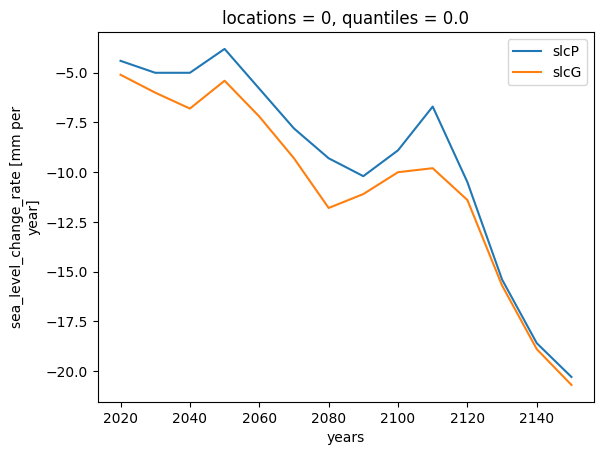

In [14]:
fig, ax = plt.subplots()
slcP.plot(ax=ax, label='slcP')
slcG.plot(ax=ax, label='slcG')
ax.legend()
plt.show()

# <font>'........................................ </font>'
### <font> 2D </font>

In [15]:
# Extract the variable to add.
slcG2D=d_ncG['sea_level_change_rate'][:,0:14,0].values
slcP2D=d_ncP['sea_level_change_rate'][:,0:14,0].values
diff2D = slcG2D - slcP2D
diff2D.shape

(107, 14)

In [16]:
diff2D

array([[-0.6999998 , -1.        , -1.8000002 , ..., -0.29999924,
        -0.29999924, -0.39999962],
       [ 0.20000005, -0.0999999 ,  0.        , ..., -0.5       ,
        -1.3999996 , -2.9000006 ],
       [ 0.        ,  0.10000014,  0.20000005, ..., -0.6999998 ,
        -0.8000002 , -0.79999924],
       ...,
       [ 0.8000002 ,  0.70000076,  0.6999998 , ...,  0.        ,
         0.        , -0.09999847],
       [ 0.5999994 ,  0.6999998 ,  0.5999994 , ...,  0.10000038,
        -0.80000114, -0.5       ],
       [ 0.8000002 ,  0.8000002 ,  2.000001  , ...,  3.        ,
         3.2000027 ,  4.699999  ]], dtype=float32)

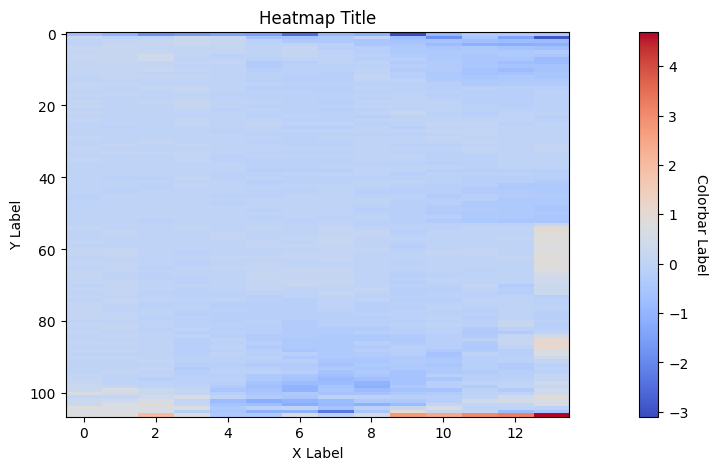

In [17]:
fig, ax = plt.subplots(figsize=(18,5))
im = ax.imshow(diff2D, cmap='coolwarm')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Colorbar Label', rotation=-90, va="bottom")
ax.set_aspect(.1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Heatmap Title')
plt.show()


# <font>'........................................ </font>'
### <font> 3D </font>

In [18]:
# Extract the variable to add.
# slcG3D=d_ncG['sea_level_change_rate'][:,0:14,:7435].values
# slcP3D=d_ncP['sea_level_change_rate'][:,0:14,:7435].values
slcG3D=d_ncG['sea_level_change_rate'][:,0:14,:700].values
slcP3D=d_ncP['sea_level_change_rate'][:,0:14,:700].values
diff3D = slcG3D - slcP3D
print('diff3D.shape=',diff3D.shape)

diff3D.shape= (107, 14, 700)


Text(0.5, 0, 'z')

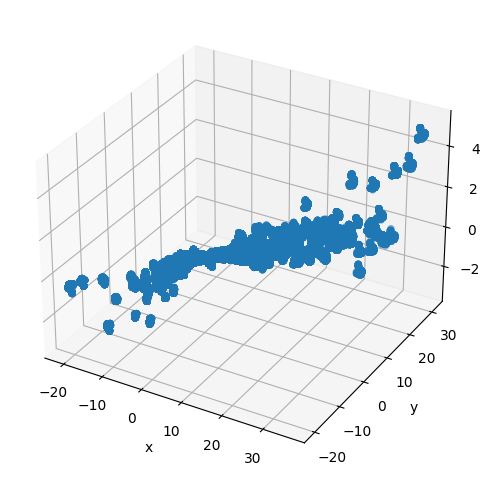

In [19]:
fig = plt.figure(figsize=(9, 6))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
XX=slcG3D
YY=slcP3D
ZZ=diff3D
ax.scatter3D(XX, YY, ZZ)
# Give labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Save figure
# plt.savefig('3d_scatter.png', dpi = 300);

In [20]:
XX=d_ncG['quantiles'].values*100
print('XX.shape=',XX.shape)

YY=d_ncG['years'][0:14].values
print('YY.shape=',YY.shape)

ZZ=np.arange(diff3D.shape[2])
print('ZZ.shape=',ZZ.shape)

XX.shape= (107,)
YY.shape= (14,)
ZZ.shape= (700,)


TypeError: set_ticks() missing 1 required positional argument: 'ticks'

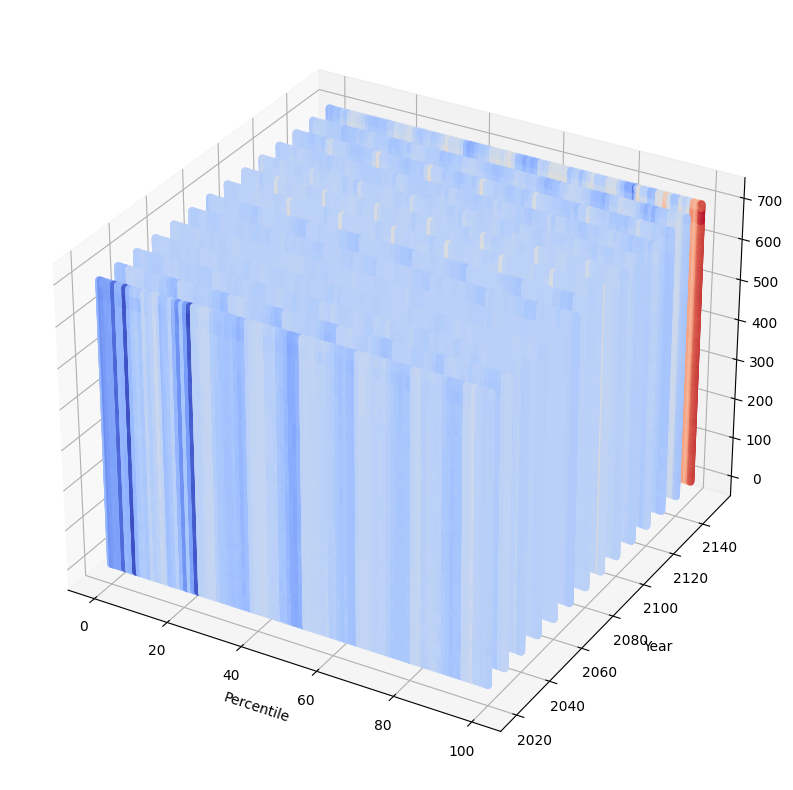

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume the variable is called 'var' with shape (107, 14, 7)
# var = np.random.rand(107, 14, 7)
var = diff3D

# Create a meshgrid for the x, y, and z dimensions
x, y, z = np.meshgrid(XX, YY, ZZ)

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
PP=ax.scatter3D(x.flatten(), y.flatten(), z.flatten(), c=var.flatten(), cmap='coolwarm')
ax.set_xlabel('Percentile')
ax.set_ylabel('Year'); #ax.set_yticks(rotation=90)
ax.set_zlabel('Station')
# fig.colorbar(PP)
cbar=plt.colorbar(PP,fraction=0.026, pad=0.14)
# plt.show()
cbar.set_label('Diff', rotation=270)



In [ ]:
# np.round(XX,2)
XX*100

array([    0.,    10.,    50.,   100.,   200.,   300.,   400.,   500.,
         600.,   700.,   800.,   900.,  1000.,  1100.,  1200.,  1300.,
        1400.,  1500.,  1600.,  1670.,  1700.,  1800.,  1900.,  2000.,
        2100.,  2200.,  2300.,  2400.,  2500.,  2600.,  2700.,  2800.,
        2900.,  3000.,  3100.,  3200.,  3300.,  3400.,  3500.,  3600.,
        3700.,  3800.,  3900.,  4000.,  4100.,  4200.,  4300.,  4400.,
        4500.,  4600.,  4700.,  4800.,  4900.,  5000.,  5100.,  5200.,
        5300.,  5400.,  5500.,  5600.,  5700.,  5800.,  5900.,  6000.,
        6100.,  6200.,  6300.,  6400.,  6500.,  6600.,  6700.,  6800.,
        6900.,  7000.,  7100.,  7200.,  7300.,  7400.,  7500.,  7600.,
        7700.,  7800.,  7900.,  8000.,  8100.,  8200.,  8300.,  8330.,
        8400.,  8500.,  8600.,  8700.,  8800.,  8900.,  9000.,  9100.,
        9200.,  9300.,  9400.,  9500.,  9600.,  9700.,  9800.,  9900.,
        9950.,  9990., 10000.])